**Анализ датасета forestfires**

этот датасет посвящен лесным пожарам на территори парка Монтесиньо в Португалии и включает атрибуты, замеренные во время пожаров

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats

In [301]:
data= pd.read_csv('../data/forestfires.csv')
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [302]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    str    
 3   day     517 non-null    str    
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), str(2)
memory usage: 52.6 KB


**Состав и описание полей файла forestfires.csv**

- `X` пространственная координата по оси x на карте парка Монтесиньо: от 1 до 9
- `Y` пространственная координата по оси Y на карте парка Монтесиньо: от 2 до 9
- `month` (месяц) месяц года: от "янв" до "декабрь"
- `day` (день) день недели: от "пн" до "вс"
- `FFMC` индекс FFMC из системы FWI: от 18,7 до 96,20.
- `DMC` индекс DMC из системы FWI: от 1,1 до 291,3
- `DC` индекс DC из системы FWI: от 7,9 до 860,6
- `ISI` индекс ISI из системы FWI: от 0,0 до 56,10
- `temp` температура в градусах Цельсия: от 2,2 до 33,30
- `RH` относительная влажность в %: от 15,0 до 100
- `wind` (ветер) скорость ветра в км/ч: от 0,40 до 9,40
- `rain` (дождь) дождь снаружи в мм/м2: от 0,0 до 6,4
- `area` сгоревшая площадь леса (в га): от 0,00 до 1090,84

In [303]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


- Пропущенных данных нет
- присутствуют str поля, требующе обработки: `month`, `day`
- `RH` - int32, остальные float

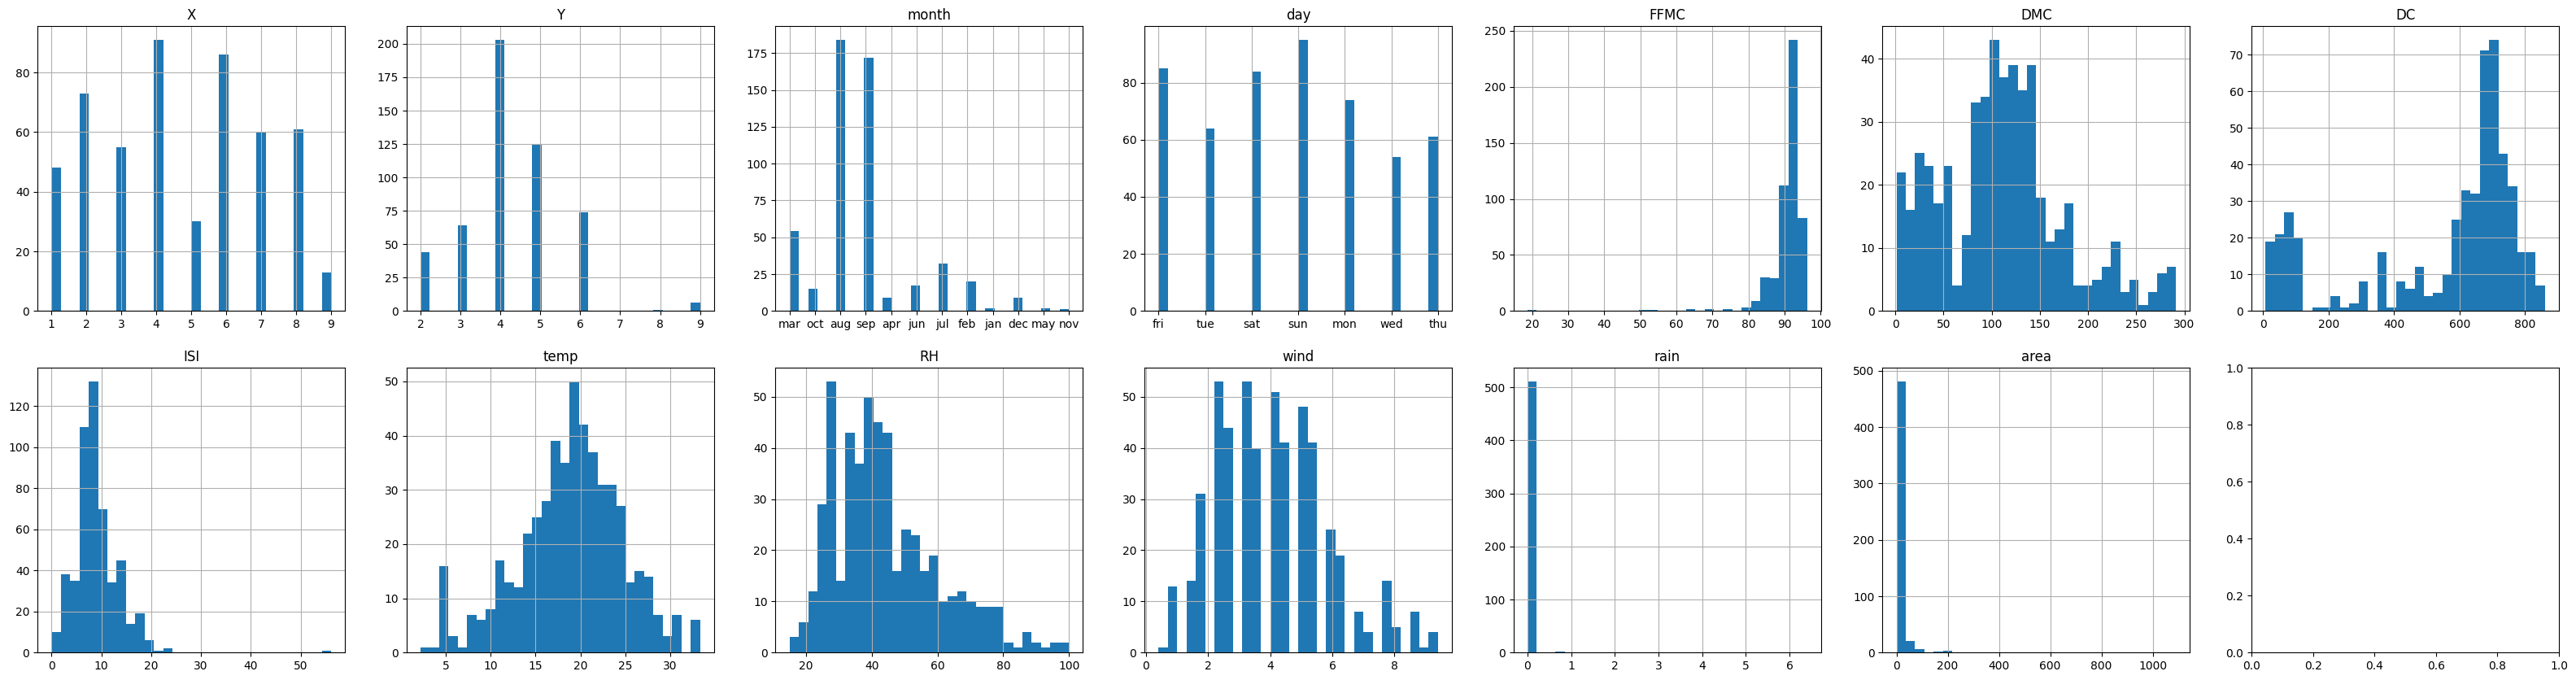

In [295]:
fig, axes = plt.subplots(2, 7, figsize=(40, 10))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    data[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)

из графиков видно, что:

- большинство пожаров возникают в августе `aug` и `sep`
- пожары приходятся относительно независимо на дни недели `day`, но при этом их пик приходится субботу `sat` и воскресенье `sun` 
- пожары, обычно затрагивают небольшие площади `area` (до 200), но при этом происходят и редкие, но очень больше пожары (более 1000)
- во время пожаров почти не бывает дождей
- пожары просиходят при положительной температуре `temp` 
- пожары возникают, в основном, на юге

In [296]:
columns = data.columns
print(columns)

str_columns = ['month', 'day']
data = pd.get_dummies(data, columns=str_columns).astype(int)  


data

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='str')


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86,26,94,5,8,51,6,0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90,35,669,6,18,33,0,0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90,43,686,6,14,33,1,0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91,33,77,9,8,97,4,0,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89,51,102,9,11,99,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81,56,665,1,27,32,2,0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81,56,665,1,21,71,5,0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81,56,665,1,21,70,6,0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94,146,614,11,25,42,4,0,...,0,0,0,0,0,1,0,0,0,0


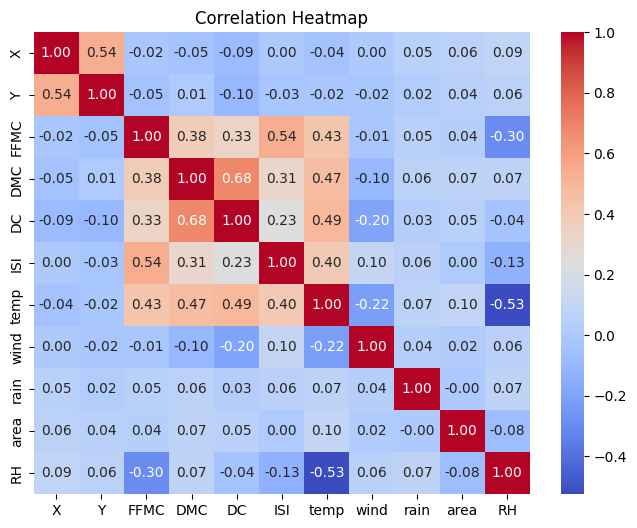

In [297]:
corr_matrix = data[cols_needed].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

из карты видно, что:

- коррелируют `x` и `y`: значит есть типичные места возгарания
- Коррелируют `FFMC`, `DMC`, `DC`, `ISI`, `TEMP` сильно между собой: индексы влажности взаимосвязаны
- влажность `RH` коррелируют отрицательно с `temp`
- `wind`скорость ветра отрицательно коррелирует с `DC` и `temp`
- остальные данные незначительно коррелируют

**Обработка выбросов**


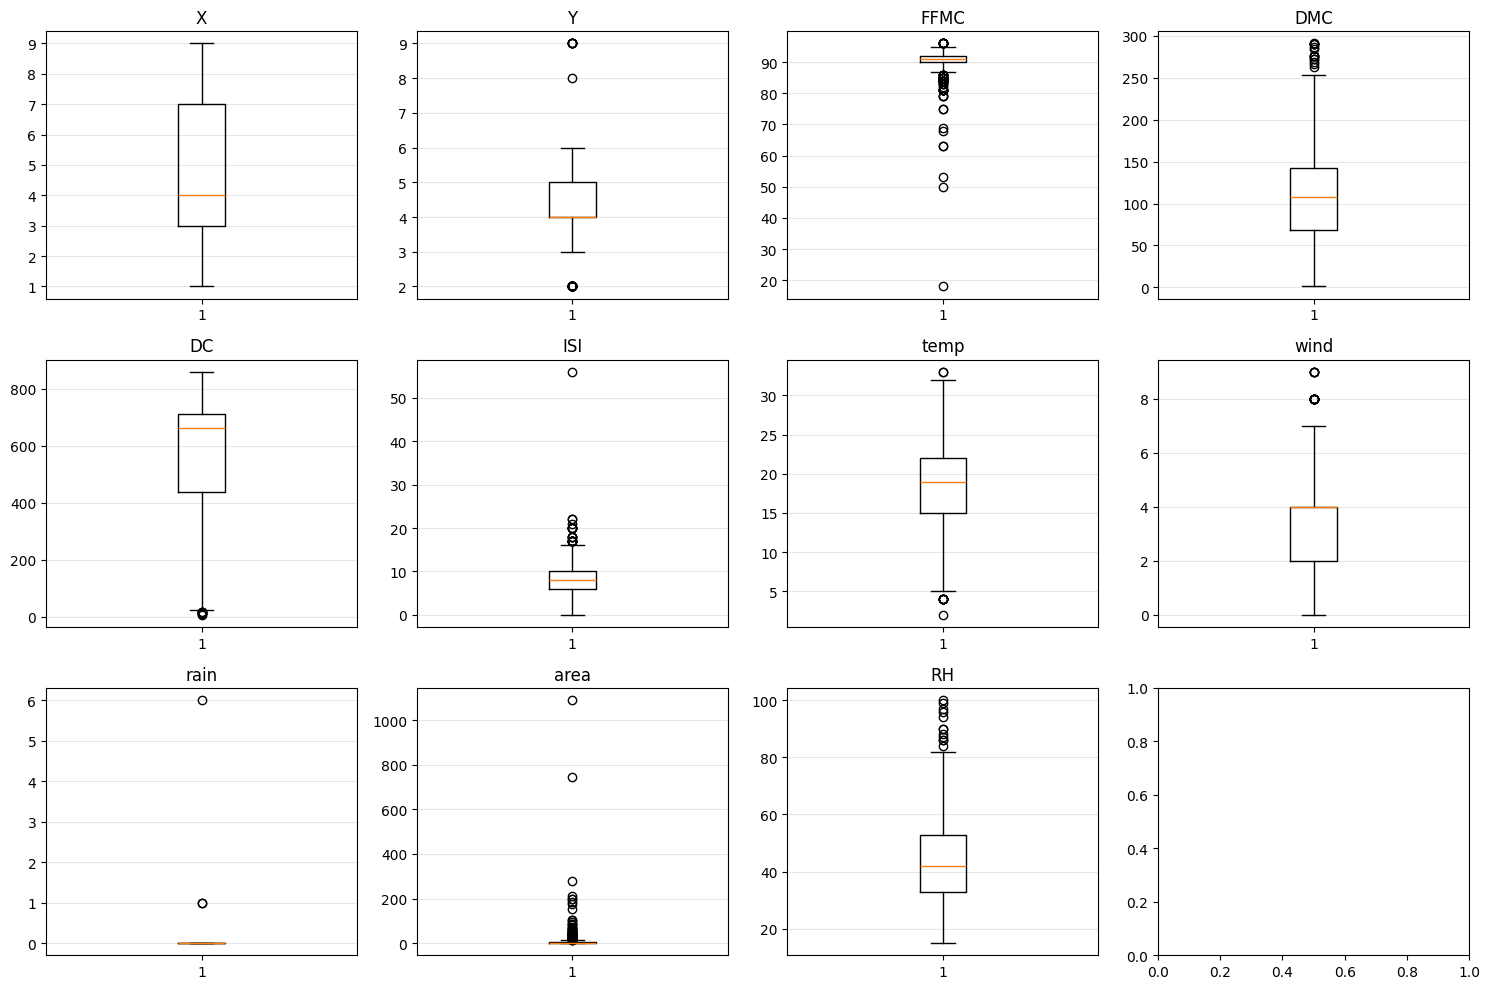

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols_needed):
    axes[i].boxplot(data[col])S
    axes[i].set_title(f'{col}')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Из boxplot видно, что:

- существет выброс по температуре (меньше 5): это странный показатель для пожара
- остальные данные в пределах нормы, и их выбросы характеризуются особенностями данных. Кажущиеся анамалью данные, при детальном расмотрении, могут быть интерпретированы как редкие, но нормальные события. Поэтому их исключать или корректировтаь не стоит

In [299]:
data = data[(data['temp'] >= 5)]

**Описательная статистика**

In [320]:
def calc_params(atr):
    print(f"сводка для {atr}")

    mean = data[atr].mean()
    print(f"Среднее: {mean}")

    median = data[atr].median()
    print(f"Медиана: {median}")

    weighted_mean = np.average(data[atr], weights=data['area'])
    print(f"средневзвешанное: {weighted_mean}")

    mode = data[atr].mode()[0]
    print(f"Мода: {mode}")

    harm_mean = stats.hmean(data[atr])
    print(f"Гармоническое среднее: {harm_mean}")

    geom_mean = stats.gmean(data[atr])
    print(f"Среднее геометрическое: {geom_mean}")

    variance = data[atr].var()
    print(f"Дисперсия: {variance}")

    std_dev = data[atr].std()
    print(f"Среднеквадратичное отклонение: {std_dev}")

    skewness = data[atr].skew()
    print(f"Смещение (асимметрия): {skewness}")

    percentiles = data[atr].quantile([0.25, 0.5, 0.75])
    print(f"Процентили:")
    print(f"  25%: {percentiles[0.25]}")
    print(f"  50%: {percentiles[0.5]}")
    print(f"  75%: {percentiles[0.75]}")
    data_range = data[atr].max() - data[atr].min()
    print(f"Диапазон (размах): {data_range}")

    print()

for atr in cols_needed:
    calc_params(atr)

сводка для X
Среднее: 4.669245647969052
Медиана: 4.0
средневзвешанное: 5.394509225314474
Мода: 4
Гармоническое среднее: 3.1609670884233254
Среднее геометрическое: 3.9615089177645566
Дисперсия: 5.353567840702922
Среднеквадратичное отклонение: 2.3137778287257666
Смещение (асимметрия): 0.036245821612869086
Процентили:
  25%: 3.0
  50%: 4.0
  75%: 7.0
Диапазон (размах): 8

сводка для Y
Среднее: 4.299806576402321
Медиана: 4.0
средневзвешанное: 4.572731310363517
Мода: 4
Гармоническое среднее: 3.910494799873935
Среднее геометрическое: 4.114139436273143
Дисперсия: 1.5126550012744964
Среднеквадратичное отклонение: 1.2299004029898097
Смещение (асимметрия): 0.41729624593033865
Процентили:
  25%: 4.0
  50%: 4.0
  75%: 5.0
Диапазон (размах): 7

сводка для FFMC
Среднее: 90.64468085106384
Медиана: 91.6
средневзвешанное: 91.73993797095775
Мода: 91.6
Гармоническое среднее: 89.81841763530761
Среднее геометрическое: 90.37350731660581
Дисперсия: 30.471623783605477
Среднеквадратичное отклонение: 5.52011084

# Итог по исследовательскому анализу данных (EDA)

В ходе выполнения лабораторной работы был проведен первичный анализ и предобработка данных о лесных пожарах (forestfires.csv). Основная цель — подготовить чистый и информативный набор данных для последующего анализа факторов, влияющих на возникновение и масштаб лесных пожаров.

1. Загрузка и первичный осмотр данных:

Датасет был загружен из файла forestfires.csv. Проверка на пропуски (data.info()) показала их полное отсутствие, что позволило сразу перейти к их анализу и обработке. В ходе первичного осмотра были выявлены два строковых поля — month (месяц) и day (день недели), которые требовали обработки для проведения корреляционного анализа.

2. Преобразование данных:

Для возможности проведения количественного анализа строковые признаки month и day были преобразованы в числовой формат с помощью метода hot spot кодирования (pd.get_dummies). Это позволило представить категориальные данные в виде бинарных признаков, пригодных для математических вычислений. Также была проведена первичная очистка данных: удалено одно аномальное значение температуры (ниже 5°C), которое было признано нехарактерным для пожароопасных условий.

3. Разведочный анализ (EDA) и предобработка:

    Визуализация распределений: Гистограммы распределения признаков наглядно продемонстрировали, что большинство пожаров возникают в августе-сентябре, а их пик приходится на выходные дни. Также было замечено, что распределение площади пожаров (area) крайне неравномерно: подавляющее большинство пожаров имеют небольшую площадь (до 200 га), при этом присутствуют несколько экстремально крупных пожаров (до 1090 га).

    Корреляционный анализ: Тепловая карта корреляций позволила выявить ключевые взаимосвязи. Наиболее важными наблюдениями стали:

        Заметная корреляция между координатами X и Y (0.54), указывающая на наличие типичных мест возникновения пожаров.

        Высокая корреляция между индексами пожарной опасности (FFMC, DMC, DC, ISI) и температурой (temp), подтверждающая их взаимосвязь при описании пожароопасных условий.

        Отрицательная корреляция между относительной влажностью (RH) и температурой (-0.53), что является ожидаемой физической закономерностью.

    Анализ выбросов: Для визуализации аномалий были построены "ящики с усами" (boxplots) для каждого числового признака. Этот анализ подтвердил наличие одного аномально низкого значения температуры, которое было удалено на этапе предобработки. Остальные экстремальные значения, особенно в признаке area, были признаны не ошибками, а редкими, но возможными событиями (напирмер крупные пожары), поэтому было принято решение их сохранить.

4. Расчет описательных статистик:

Для всех числовых признаков были рассчитаны ключевые метрики: среднее арифметическое, медиана, мода, средневзвешенное (по площади пожара), гармоническое среднее, среднее геометрическое, дисперсия, среднеквадратичное отклонение, асимметрия, процентили и диапазон.

    Ключевое наблюдение по температуре: Средневзвешенное по площади значение температуры (21.7°C) значительно выше обычного среднего (18.9°C). Это является важным статистическим подтверждением того, что крупные пожары происходят при более высоких температурах, чем "среднестатистические" пожары.

    Ключевое наблюдение по влажности: Средневзвешенное по площади значение относительной влажности (38.2%) ниже общего среднего (44.3%). Это говорит о том, что крупные пожары возникают в условиях более низкой влажности.

    Ключевое наблюдение по площади пожара: Кардинальное различие между средним (12.85 га) и медианным (0.52 га) значениями площади является доказательством сильной правосторонней асимметрии распределения. Медиана является более репрезентативной мерой типичного пожара, в то время как среднее значение сильно завышено из-за небольшого количества катастрофических пожаров.

    Ключевое наблюдение по осадкам: Медиана и мода признака rain равны нулю, что статистически подтверждает визуальный вывод: пожары происходят, в основном, в сухую погоду.